## Dragon Real Estate Price Predictor

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv("data.csv") 

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287871,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704365,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.628000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

## For plotting histogram
### import matplotlib.pyplot as plt 
### housing.hist(bins=50, figsize=(20,15)) 

## Train-Test Spliting

In [11]:
# For Learning purposes. 
import numpy as np 
def split_train_test(data, test_ratio): 
    np.random.seed(42) 
    shuffeld = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffeld[:test_set_size] 
    train_indices = shuffeld[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices] 
train_set, test_set = split_train_test(housing, 0.2) 
print(f"Rows in Train set : {len(train_set)} \nRows in Test set : {len(test_set)}\n") 

Rows in Train set : 405 
Rows in Test set : 101



In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) 
print(f"Rows in Train set : {len(train_set)} \nRows in Test set : {len(test_set)}\n") 

Rows in Train set : 404 
Rows in Test set : 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(housing, housing['CHAS']): 
    strat_train_set = housing.loc[train_index] 
    strat_test_set = housing.loc[test_index] 

In [14]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
strat_test_set['CHAS'].value_counts() 

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

### You should not be consider looking for correlations, instead your next step should be: 
### housing = strat_train_set.copy() 


## Looking for Correlations. 

In [19]:
corr_matrix = housing.corr() 
corr_matrix['MEDV'].sort_values(ascending=False) 

MEDV       1.000000
RM         0.695094
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE31DA4DC0>,
      dtype=object)

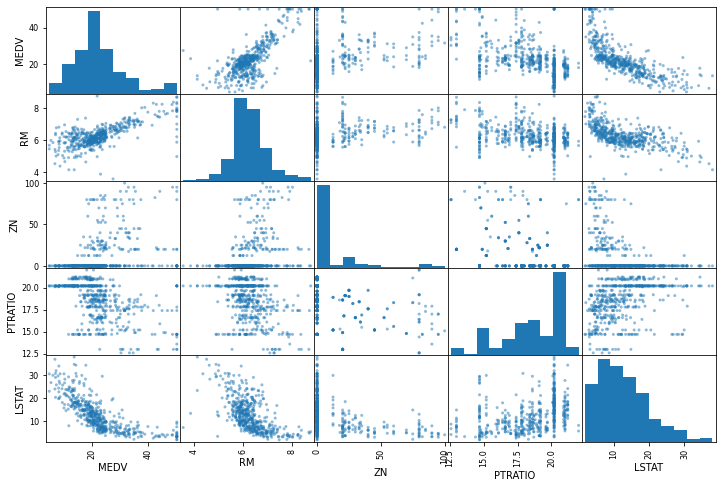

In [20]:
from pandas.plotting import scatter_matrix
attr = ["MEDV", "RM", "ZN", "PTRATIO", "LSTAT"] 
scatter_matrix(housing[attr], figsize=(12,8)) 

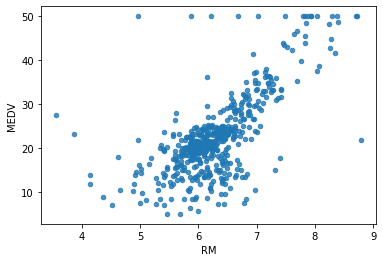

In [21]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8) 

## Trying Attribute Combinations. 

In [23]:
housing['TAXRM'] = housing["TAX"]/housing["RM"] 

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [25]:
corr_matrix = housing.corr() 
corr_matrix['MEDV'].sort_values(ascending=False) 

MEDV       1.000000
RM         0.695094
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.540510
LSTAT     -0.737663
Name: MEDV, dtype: float64

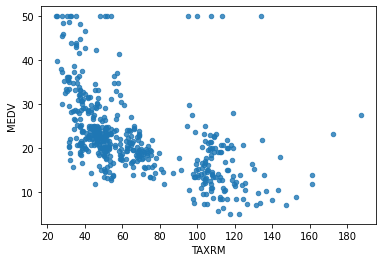

In [26]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [27]:
housing = strat_train_set.drop("MEDV", axis=1)
house_labels = strat_train_set["MEDV"].copy() 

## Missing Attributes. 
### To take care of missing attributes, we have 3 options: 
 1. Get rid of the missing data points. 
 2. Get rid of the entire attribute. 
 3. Set the Null values to some value(zero, mean or median).  

In [29]:
a = housing.dropna(subset=["RM"]) # Option 1 
a.shape 

(400, 13)

In [30]:
housing.drop("RM", axis=1).head() # Option 2 
# Note that there is no RM Column. 

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15


In [31]:
median = housing["RM"].median() # Option 3
median 
housing["RM"].fillna(median).head() 

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
Name: RM, dtype: float64

In [32]:
housing.shape # Original DataSet is not Changed. 

(404, 13)

In [33]:
# before we started imputer 
housing.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283922,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715273,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [34]:
# To use modules of sklearn to fill undesired None values, i.e. Option 3. 
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median") 
imputer.fit(housing) 

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [35]:
imputer.statistics_ 

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21750e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [36]:
X = imputer.transform(housing) 

In [37]:
housing_trans = pd.DataFrame(X, columns=housing.columns) 
housing_trans.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283265,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711745,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design 

In [39]:
# Primarily 3 types of Objects. 
# 1. Estimators - It estimates some parameters bsed on a dataset. Eg. Imputer. 
# It has fit() and transform() methods. 
# Fit Method fit() - fits the dataset and calculates internal parameters. 

# 2. Transformers - transform method takes input and return outputs based on the learnings of fit(). It also has a function known as fit_transform(). 

# 3. Predictors - In-built ML models like LinearRegression model, etc. 
# It has fit(), score() and predict() methods. 
# Score Method score() - It will evaluate the predictions. 

In [40]:
## Feature Scaling. 
# Primarily, 2 types of feature scaling methods: 
# 1. Min-max scaling (Normalization)
#     (value - min) / (max - min) 
#     Sklearn provides a class named MinMaxScaler for this. 
# 2. Standardization 
#     (value - mean) / standard deviation. 
#     Sklearn provides a class named StandardScaler for this. 

### Creating Pipeline 

In [41]:
from sklearn.pipeline  import Pipeline 
from sklearn.preprocessing import StandardScaler 
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('std_scaler', StandardScaler()), 
])

In [42]:
house_ntr = my_pipeline.fit_transform(housing) 
house_ntr
house_ntr.shape

(404, 13)

### Selecting a Desired Model. 

In [43]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
# model = DecisionTreeRegressor() 
# model = LinearRegression()   
model = RandomForestRegressor() 
model.fit(house_ntr, house_labels) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Testing for Predictions. 

In [44]:
f_data = housing.iloc[:5] 
l_data = house_labels.iloc[:5] 

In [45]:
prep_data = my_pipeline.transform(f_data) 

In [46]:
model.predict(prep_data) 

array([22.486, 25.546, 16.306, 23.435, 23.432])

In [47]:
list(l_data) 

[21.9, 24.5, 16.7, 23.1, 23.0]

### Evaluating the Model. 

In [48]:
from sklearn.metrics import mean_squared_error 
house_pred = model.predict(house_ntr) 
mse = mean_squared_error(house_labels, house_pred) 
rmse = np.sqrt(mse) 
rmse 
# Data got overfitted. 

1.168451018305096

## Using better Evaluation Technique - Cross Validation. 

In [49]:
# 1 2 3 4 5 6 7 8 9 10 
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(model, house_ntr, house_labels, scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-scores)  

In [50]:
rmse_scores

array([2.80042321, 2.71818959, 4.387986  , 2.5856292 , 3.33106226,
       2.57931729, 4.77771748, 3.25379055, 3.33590915, 3.24554808])

In [51]:
def print_scores(scores):
    print("Scores : ", scores) 
    print("Mean : ", scores.mean()) 
    print("Standard Deviations : ", scores.std()) 

In [52]:
print_scores(rmse_scores) 

Scores :  [2.80042321 2.71818959 4.387986   2.5856292  3.33106226 2.57931729
 4.77771748 3.25379055 3.33590915 3.24554808]
Mean :  3.301557280987781
Standard Deviations :  0.7065750080082986


In [53]:
from joblib import dump, load
dump(model, "Dragon.joblib") 

['Dragon.joblib']

In [54]:
## Testing the Model on Test Data 

In [55]:
X_test = strat_test_set.drop("MEDV", axis=1) 
Y_test = strat_test_set["MEDV"].copy() 
X_test_prep = my_pipeline.transform(X_test) 
final_preds = model.predict(X_test_prep) 
final_mse = mean_squared_error(Y_test, final_preds) 
final_rmse = np.sqrt(final_mse) 

In [56]:
print(final_mse, "  ", final_rmse) 

8.656958411764704    2.9422709616493012


In [57]:
prep_data[3]

array([-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
        0.13045416, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
        0.52982668,  0.45343469, -0.81939807])

In [59]:
## Using the Model. 

In [60]:
from joblib import dump, load 
import numpy as np 
model = load("Dragon.joblib") 
features = np.array([[-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
        0.13045416, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
        0.52982668,  0.45343469, -0.81939807]]) 
model.predict(features) 

array([23.435])